<a href="https://colab.research.google.com/github/ramees-thattarath/TDS-proj-1/blob/main/TDS_proj_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch users from Bangalore who has over 100 followers

In [56]:
import pandas as pd

In [58]:
import requests
from google.colab import userdata
import json

users = []
GITHUB_API_KEY = userdata.get('GITHUB_API_KEY')
headers = { "Authorization": f"Bearer {GITHUB_API_KEY}", "Accept": "application/vnd.github+json"}

def scrape_users_in_bangalore():
    base_url = "https://api.github.com/search/users"
    per_page = 100
    page = 1
    params = {
            "q": "location:Bangalore followers:>100",
            "per_page": per_page,
            "page": page
        }

    while True:
      response = requests.get(base_url, params=params, headers=headers)
      if response.status_code == 200:
        data = response.json()
        users.extend(data["items"])
        if len(data["items"]) < per_page:
            break
        page += 1
        params["page"] = page
      else:
          print(f"Error fetching users: {response.status_code}")
          return

    print(len(users))

scrape_users_in_bangalore()


593


# Get the details of the users and store it in a list and then convert it to pandas DataFrame

In [59]:
def get_user_data(username):
    url = f"https://api.github.com/users/{username}"
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        user_data = response.json()
        return user_data
    else:
        print(f"Error fetching user data for {username}: {response.status_code}")
        return None

user_data_list = []
for user in users:
    username = user["login"]
    user_data = get_user_data(username)
    if user_data:
        user_data_list.append(user_data)
print(len(user_data_list))

593


In [60]:
df_users = pd.read_json(json.dumps(user_data_list))
df_users.head()

<ipython-input-60-f1bc632cfb7b>:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_users = pd.read_json(json.dumps(user_data_list))


,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,...,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,krishnaik06,20041231,MDQ6VXNlcjIwMDQxMjMx,https://avatars.githubusercontent.com/u/200412...,,https://api.github.com/users/krishnaik06,https://github.com/krishnaik06,https://api.github.com/users/krishnaik06/follo...,https://api.github.com/users/krishnaik06/follo...,https://api.github.com/users/krishnaik06/gists...,...,krishnaik06@gmail.com,NaN,Data Scientist with ML and Deep Learning expe...,None,330,0,30927,0,2016-06-20 09:25:45+00:00,2024-10-30 16:00:00+00:00
1,championswimmer,1327050,MDQ6VXNlcjEzMjcwNTA=,https://avatars.githubusercontent.com/u/132705...,,https://api.github.com/users/championswimmer,https://github.com/championswimmer,https://api.github.com/users/championswimmer/f...,https://api.github.com/users/championswimmer/f...,https://api.github.com/users/championswimmer/g...,...,dev@championswimmer.in,1.0,Director of Engineering - @JioCinema ┃\r\nPast...,championswimmer,351,62,4664,29,2012-01-13 07:41:40+00:00,2024-10-29 13:26:11+00:00
2,arpitbbhayani,4745789,MDQ6VXNlcjQ3NDU3ODk=,https://avatars.githubusercontent.com/u/474578...,,https://api.github.com/users/arpitbbhayani,https://github.com/arpitbbhayani,https://api.github.com/users/arpitbbhayani/fol...,https://api.github.com/users/arpitbbhayani/fol...,https://api.github.com/users/arpitbbhayani/gis...,...,None,1.0,"Creator of @DiceDB • ex-Google Dataproc, ex-Am...",arpit_bhayani,188,46,4566,3,2013-06-20 06:40:12+00:00,2024-08-14 11:15:17+00:00
3,manjunath5496,19967403,MDQ6VXNlcjE5OTY3NDAz,https://avatars.githubusercontent.com/u/199674...,,https://api.github.com/users/manjunath5496,https://github.com/manjunath5496,https://api.github.com/users/manjunath5496/fol...,https://api.github.com/users/manjunath5496/fol...,https://api.github.com/users/manjunath5496/gis...,...,manjunath5496@gmail.com,NaN,"""Science is not only a disciple of reason but,...",None,1563,0,4091,9313,2016-06-16 05:02:32+00:00,2024-08-01 19:32:17+00:00
4,tanaypratap,10216863,MDQ6VXNlcjEwMjE2ODYz,https://avatars.githubusercontent.com/u/102168...,,https://api.github.com/users/tanaypratap,https://github.com/tanaypratap,https://api.github.com/users/tanaypratap/follo...,https://api.github.com/users/tanaypratap/follo...,https://api.github.com/users/tanaypratap/gists...,...,tanay.mit@gmail.com,NaN,Founder & CEO @invact . Teacher @neogcamp,tanaypratap,40,22,3029,1,2014-12-17 05:15:06+00:00,2024-10-02 17:26:11+00:00


# Fetch atmost 500 repos where these users have pushed recenetly and store it in a list and convert to pandas DataFrame

In [62]:
import time

def fetch_recent_repos(username, max_repos=500):

    url = f"https://api.github.com/users/{username}/repos"
    page = 1
    per_page = 100
    repos = []

    while len(repos) < max_repos:
        params = {
            "per_page": per_page,
            "page": page,
            "type": "all",
            "sort": "pushed",
            "direction": "desc"
        }
        response = requests.get(url, params=params, headers=headers)

        if response.status_code == 200:
            data = response.json()
            if not data:
              break
            repos.extend(data)
            page += 1
        else:
            print(f"Error fetching repositories for {username}: {response.status_code}")
            break

    return repos[:max_repos]

repo_data_list = []
for user in user_data_list:
    username = user["login"]
    repos = fetch_recent_repos(username)
    # append username to each repository row as it is not available in response
    for repo in repos:
      repo['login'] = username
    repo_data_list.extend(repos)
    time.sleep(1)

print(len(repo_data_list))

54882


In [94]:
df_repos = pd.read_json(json.dumps(repo_data_list))
df_repos.head(20)

<ipython-input-94-beb9cd2c245f>:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_repos = pd.read_json(json.dumps(repo_data_list))


,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,is_template,web_commit_signoff_required,topics,visibility,forks,open_issues,watchers,default_branch,permissions,login
0,879616069,R_kgDONG3gRQ,Polars-GPU-Engine-Demo,krishnaik06/Polars-GPU-Engine-Demo,False,"{'login': 'krishnaik06', 'id': 20041231, 'node...",https://github.com/krishnaik06/Polars-GPU-Engi...,None,False,https://api.github.com/repos/krishnaik06/Polar...,...,False,False,[],public,2,0,4,main,"{'admin': False, 'maintain': False, 'push': Fa...",krishnaik06
1,875292857,R_kgDONCvouQ,Transformers-Materials,krishnaik06/Transformers-Materials,False,"{'login': 'krishnaik06', 'id': 20041231, 'node...",https://github.com/krishnaik06/Transformers-Ma...,None,False,https://api.github.com/repos/krishnaik06/Trans...,...,False,False,[],public,2,0,11,main,"{'admin': False, 'maintain': False, 'push': Fa...",krishnaik06
2,872943143,R_kgDONAgOJw,ETLWeather,krishnaik06/ETLWeather,False,"{'login': 'krishnaik06', 'id': 20041231, 'node...",https://github.com/krishnaik06/ETLWeather,None,False,https://api.github.com/repos/krishnaik06/ETLWe...,...,False,False,[],public,6,0,8,main,"{'admin': False, 'maintain': False, 'push': Fa...",krishnaik06
3,869318711,R_kgDOM9DANw,datasets,krishnaik06/datasets,False,"{'login': 'krishnaik06', 'id': 20041231, 'node...",https://github.com/krishnaik06/datasets,None,False,https://api.github.com/repos/krishnaik06/datasets,...,False,False,[],public,0,0,3,main,"{'admin': False, 'maintain': False, 'push': Fa...",krishnaik06
4,866108025,R_kgDOM5_CeQ,testdagshub,krishnaik06/testdagshub,False,"{'login': 'krishnaik06', 'id': 20041231, 'node...",https://github.com/krishnaik06/testdagshub,None,False,https://api.github.com/repos/krishnaik06/testd...,...,False,False,[],public,0,0,0,main,"{'admin': False, 'maintain': False, 'push': Fa...",krishnaik06
5,851117112,R_kgDOMrsEOA,dockerimagehub,krishnaik06/dockerimagehub,False,"{'login': 'krishnaik06', 'id': 20041231, 'node...",https://github.com/krishnaik06/dockerimagehub,None,False,https://api.github.com/repos/krishnaik06/docke...,...,False,False,[],public,9,0,13,main,"{'admin': False, 'maintain': False, 'push': Fa...",krishnaik06
6,850979154,R_kgDOMrjpUg,appgithubaction,krishnaik06/appgithubaction,False,"{'login': 'krishnaik06', 'id': 20041231, 'node...",https://github.com/krishnaik06/appgithubaction,None,False,https://api.github.com/repos/krishnaik06/appgi...,...,False,False,[],public,7,0,9,main,"{'admin': False, 'maintain': False, 'push': Fa...",krishnaik06
7,850978627,R_kgDOMrjnQw,PythonProjectgithubaction,krishnaik06/PythonProjectgithubaction,False,"{'login': 'krishnaik06', 'id': 20041231, 'node...",https://github.com/krishnaik06/PythonProjectgi...,None,False,https://api.github.com/repos/krishnaik06/Pytho...,...,False,False,[],public,0,0,4,main,"{'admin': False, 'maintain': False, 'push': Fa...",krishnaik06
8,713271825,R_kgDOKoOqEQ,Complete-Langchain-Tutorials,krishnaik06/Complete-Langchain-Tutorials,False,"{'login': 'krishnaik06', 'id': 20041231, 'node...",https://github.com/krishnaik06/Complete-Langch...,None,False,https://api.github.com/repos/krishnaik06/Compl...,...,False,False,[],public,286,14,350,main,"{'admin': False, 'maintain': False, 'push': Fa...",krishnaik06
9,646324750,R_kgDOJoYiDg,Text-Summarization-NLP-Project,krishnaik06/Text-Summarization-NLP-Project,False,"{'login': 'krishnaik06', 'id': 20041231, 'node...",https://github.com/krishnaik06/Text-Summarizat...,None,False,https://api.github.com/repos/krishnaik06/Text-...,...,False,False,[],public,104,7,148,main,"{'admin': False, 'maintain': False, 'push': Fa...",krishnaik06


In [64]:
df_users.to_csv('users_scrapped.csv', index=False)
df_repos.to_csv('repositories_scrapped.csv', index=False)

# Filter required fields from user's DataFrame and do the necessary transformations

In [67]:
df_users_filtered = df_users[['login', 'name','company', 'location', 'email', 'hireable', 'bio', 'public_repos', 'followers', 'following', 'created_at']]
df_users_filtered.head()

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,krishnaik06,Krish C Naik,Panasonic IIC,Bangalore,krishnaik06@gmail.com,NaN,Data Scientist with ML and Deep Learning expe...,330,30927,0,2016-06-20 09:25:45+00:00
1,championswimmer,Arnav Gupta,@jiocinema,"Bangalore, India",dev@championswimmer.in,1.0,Director of Engineering - @JioCinema ┃\r\nPast...,351,4664,29,2012-01-13 07:41:40+00:00
2,arpitbbhayani,Arpit Bhayani,@DiceDB,Bangalore,None,1.0,"Creator of @DiceDB • ex-Google Dataproc, ex-Am...",188,4566,3,2013-06-20 06:40:12+00:00
3,manjunath5496,Manjunath.R,@myw3schools.com,"Bangalore, India",manjunath5496@gmail.com,NaN,"""Science is not only a disciple of reason but,...",1563,4091,9313,2016-06-16 05:02:32+00:00
4,tanaypratap,Tanay Pratap,@invact,"Bangalore, India",tanay.mit@gmail.com,NaN,Founder & CEO @invact . Teacher @neogcamp,40,3029,1,2014-12-17 05:15:06+00:00


In [68]:
df_users_filtered['company'] = df_users_filtered['company'].astype(str)
df_users_filtered['company'] = df_users_filtered['company'].str.strip()
df_users_filtered['company'] = df_users_filtered['company'].str.replace(r'^@', '', regex=True)
df_users_filtered['company'] = df_users_filtered['company'].str.upper()
df_users_filtered.head()

<ipython-input-68-366cde875bc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_filtered['company'] = df_users_filtered['company'].astype(str)
<ipython-input-68-366cde875bc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_filtered['company'] = df_users_filtered['company'].str.strip()
<ipython-input-68-366cde875bc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,krishnaik06,Krish C Naik,PANASONIC IIC,Bangalore,krishnaik06@gmail.com,NaN,Data Scientist with ML and Deep Learning expe...,330,30927,0,2016-06-20 09:25:45+00:00
1,championswimmer,Arnav Gupta,JIOCINEMA,"Bangalore, India",dev@championswimmer.in,1.0,Director of Engineering - @JioCinema ┃\r\nPast...,351,4664,29,2012-01-13 07:41:40+00:00
2,arpitbbhayani,Arpit Bhayani,DICEDB,Bangalore,None,1.0,"Creator of @DiceDB • ex-Google Dataproc, ex-Am...",188,4566,3,2013-06-20 06:40:12+00:00
3,manjunath5496,Manjunath.R,MYW3SCHOOLS.COM,"Bangalore, India",manjunath5496@gmail.com,NaN,"""Science is not only a disciple of reason but,...",1563,4091,9313,2016-06-16 05:02:32+00:00
4,tanaypratap,Tanay Pratap,INVACT,"Bangalore, India",tanay.mit@gmail.com,NaN,Founder & CEO @invact . Teacher @neogcamp,40,3029,1,2014-12-17 05:15:06+00:00


In [69]:
df_users_filtered['company'].value_counts()

,count
company,
NONE,172
GOOGLE,15
MICROSOFT,9
MASAI SCHOOL,8
RAZORPAY,7
...,...
SDE2 AT TAP INVEST,1
RAKUTEN,1
ITC INFOTECH,1


In [70]:
df_users_filtered['company'] = df_users_filtered['company'].replace('NONE', '')
df_users_filtered['company'].value_counts()

<ipython-input-70-f1be018525b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_filtered['company'] = df_users_filtered['company'].replace('NONE', '')


,count
company,
,172
GOOGLE,15
MICROSOFT,9
MASAI SCHOOL,8
RAZORPAY,7
...,...
SDE2 AT TAP INVEST,1
RAKUTEN,1
ITC INFOTECH,1


In [71]:
df_users_filtered['company'].value_counts().to_csv('company_counts.csv')

In [74]:
df_users_filtered.isnull().sum()

,0
login,0
name,6
company,0
location,0
email,253
hireable,0
bio,93
public_repos,0
followers,0
following,0


In [73]:
df_users_filtered['hireable'] = df_users_filtered['hireable'].fillna('false')
df_users_filtered['hireable'] = df_users_filtered['hireable'].replace(1.0, 'true')
df_users_filtered.head()

<ipython-input-73-5efdf0afd349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_filtered['hireable'] = df_users_filtered['hireable'].fillna('false')
<ipython-input-73-5efdf0afd349>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_filtered['hireable'] = df_users_filtered['hireable'].replace(1.0, 'true')


,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,krishnaik06,Krish C Naik,PANASONIC IIC,Bangalore,krishnaik06@gmail.com,false,Data Scientist with ML and Deep Learning expe...,330,30927,0,2016-06-20 09:25:45+00:00
1,championswimmer,Arnav Gupta,JIOCINEMA,"Bangalore, India",dev@championswimmer.in,true,Director of Engineering - @JioCinema ┃\r\nPast...,351,4664,29,2012-01-13 07:41:40+00:00
2,arpitbbhayani,Arpit Bhayani,DICEDB,Bangalore,None,true,"Creator of @DiceDB • ex-Google Dataproc, ex-Am...",188,4566,3,2013-06-20 06:40:12+00:00
3,manjunath5496,Manjunath.R,MYW3SCHOOLS.COM,"Bangalore, India",manjunath5496@gmail.com,false,"""Science is not only a disciple of reason but,...",1563,4091,9313,2016-06-16 05:02:32+00:00
4,tanaypratap,Tanay Pratap,INVACT,"Bangalore, India",tanay.mit@gmail.com,false,Founder & CEO @invact . Teacher @neogcamp,40,3029,1,2014-12-17 05:15:06+00:00


In [75]:
df_users_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   login         593 non-null    object             
 1   name          587 non-null    object             
 2   company       593 non-null    object             
 3   location      593 non-null    object             
 4   email         340 non-null    object             
 5   hireable      593 non-null    object             
 6   bio           500 non-null    object             
 7   public_repos  593 non-null    int64              
 8   followers     593 non-null    int64              
 9   following     593 non-null    int64              
 10  created_at    593 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 51.1+ KB


In [76]:
df_users_filtered.isnull().sum()

,0
login,0
name,6
company,0
location,0
email,253
hireable,0
bio,93
public_repos,0
followers,0
following,0


In [77]:
df_users_filtered.fillna('', inplace=True)

<ipython-input-77-467e6f21cc59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_filtered.fillna('', inplace=True)


In [78]:
df_users_filtered.head()

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,krishnaik06,Krish C Naik,PANASONIC IIC,Bangalore,krishnaik06@gmail.com,false,Data Scientist with ML and Deep Learning expe...,330,30927,0,2016-06-20 09:25:45+00:00
1,championswimmer,Arnav Gupta,JIOCINEMA,"Bangalore, India",dev@championswimmer.in,true,Director of Engineering - @JioCinema ┃\r\nPast...,351,4664,29,2012-01-13 07:41:40+00:00
2,arpitbbhayani,Arpit Bhayani,DICEDB,Bangalore,,true,"Creator of @DiceDB • ex-Google Dataproc, ex-Am...",188,4566,3,2013-06-20 06:40:12+00:00
3,manjunath5496,Manjunath.R,MYW3SCHOOLS.COM,"Bangalore, India",manjunath5496@gmail.com,false,"""Science is not only a disciple of reason but,...",1563,4091,9313,2016-06-16 05:02:32+00:00
4,tanaypratap,Tanay Pratap,INVACT,"Bangalore, India",tanay.mit@gmail.com,false,Founder & CEO @invact . Teacher @neogcamp,40,3029,1,2014-12-17 05:15:06+00:00


# export the final user data as csv file

In [79]:
df_users_filtered.to_csv('users.csv', index=False)

# Filter required fields from repository DataFrame and do the necessary transformations

In [80]:
df_repos.columns

Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'forks_url', 'keys_url',
       'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url',
       'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url',
       'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url',
       'languages_url', 'stargazers_url', 'contributors_url',
       'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url',
       'comments_url', 'issue_comment_url', 'contents_url', 'compare_url',
       'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url',
       'milestones_url', 'notifications_url', 'labels_url', 'releases_url',
       'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url',
       'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size',
       'stargazers_count', 'watchers_count', 'language', 'has_issues',
       'has_projects', 'has_downloads', 'has_wiki', 'has

In [81]:
df_repos_filtered = df_repos[['login', 'full_name', 'created_at', 'stargazers_count', 'watchers_count', 'language', 'has_projects', 'has_wiki', 'license']]
df_repos_filtered.head()

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license
0,krishnaik06,krishnaik06/Polars-GPU-Engine-Demo,2024-10-28 08:42:45+00:00,4,4,Jupyter Notebook,True,True,"{'key': 'gpl-3.0', 'name': 'GNU General Public..."
1,krishnaik06,krishnaik06/Transformers-Materials,2024-10-19 15:43:30+00:00,11,11,None,True,True,"{'key': 'gpl-3.0', 'name': 'GNU General Public..."
2,krishnaik06,krishnaik06/ETLWeather,2024-10-15 10:45:09+00:00,8,8,Python,True,True,"{'key': 'gpl-3.0', 'name': 'GNU General Public..."
3,krishnaik06,krishnaik06/datasets,2024-10-08 05:16:12+00:00,3,3,None,True,True,"{'key': 'gpl-3.0', 'name': 'GNU General Public..."
4,krishnaik06,krishnaik06/testdagshub,2024-10-01 16:57:42+00:00,0,0,None,True,True,None


In [82]:
df_repos_filtered['license'].isnull().sum()

32432

In [83]:
df_repos_filtered['license_name'] = df_repos_filtered['license'].apply(lambda x: x['key'] if isinstance(x, dict) else None)

<ipython-input-83-f009da85716c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repos_filtered['license_name'] = df_repos_filtered['license'].apply(lambda x: x['key'] if isinstance(x, dict) else None)


In [84]:
df_repos_filtered.drop('license', axis=1, inplace=True)

<ipython-input-84-e6aef1902a20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repos_filtered.drop('license', axis=1, inplace=True)


In [85]:
df_repos_filtered.fillna('', inplace=True)

<ipython-input-85-d5563e0288ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repos_filtered.fillna('', inplace=True)


In [86]:
df_repos_filtered.isnull().sum()

,0
login,0
full_name,0
created_at,0
stargazers_count,0
watchers_count,0
language,0
has_projects,0
has_wiki,0
license_name,0


In [87]:
df_repos_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54882 entries, 0 to 54881
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   login             54882 non-null  object             
 1   full_name         54882 non-null  object             
 2   created_at        54882 non-null  datetime64[ns, UTC]
 3   stargazers_count  54882 non-null  int64              
 4   watchers_count    54882 non-null  int64              
 5   language          54882 non-null  object             
 6   has_projects      54882 non-null  bool               
 7   has_wiki          54882 non-null  bool               
 8   license_name      54882 non-null  object             
dtypes: bool(2), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 3.0+ MB


In [88]:
df_repos_filtered['has_projects'] = df_repos_filtered['has_projects'].replace(True, 'true')
df_repos_filtered['has_projects'] = df_repos_filtered['has_projects'].replace(False, 'false')
df_repos_filtered['has_wiki'] = df_repos_filtered['has_wiki'].replace(True, 'true')
df_repos_filtered['has_wiki'] = df_repos_filtered['has_wiki'].replace(False, 'false')

<ipython-input-88-7326be68b3b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repos_filtered['has_projects'] = df_repos_filtered['has_projects'].replace(True, 'true')
<ipython-input-88-7326be68b3b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repos_filtered['has_projects'] = df_repos_filtered['has_projects'].replace(False, 'false')
<ipython-input-88-7326be68b3b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [89]:
df_repos_filtered['has_projects'].value_counts()

,count
has_projects,
true,54310
false,572


# Export repository data as csv file

In [90]:
df_repos_filtered.to_csv('repositories.csv', index=False)

## Importing data for testing (In case the above dataframes are not in memory)

In [3]:
import pandas as pd
df_users_filtered = pd.read_csv('users.csv')
df_repos_filtered = pd.read_csv('repositories.csv')

# Answering questions

In [97]:
top_5_users = df_users_filtered.nlargest(5, 'followers')
top_5_users['login'].str.cat(sep=',')

'krishnaik06,championswimmer,arpitbbhayani,manjunath5496,tanaypratap'

In [98]:
earliest_5_users = df_users_filtered.nsmallest(5, 'created_at')
result = ','.join(earliest_5_users['login'].tolist())
result

'anandology,irfn,jace,abhisek,abhin4v'

In [100]:
license_counts = df_repos_filtered['license_name'].value_counts()
top_3_licenses = license_counts[license_counts.index != ''].nlargest(3).index.tolist()
','.join(top_3_licenses)

'mit,apache-2.0,other'

In [101]:
df_users_filtered['company'].value_counts()

,count
company,
,172
GOOGLE,15
MICROSOFT,9
MASAI SCHOOL,8
RAZORPAY,7
...,...
SDE2 AT TAP INVEST,1
RAKUTEN,1
ITC INFOTECH,1


In [102]:
df_repos_filtered['language'].value_counts()

,count
language,
,15293
JavaScript,9659
Python,5757
HTML,3959
Java,3319
...,...
RAML,1
AMPL,1
Vim Snippet,1


In [103]:
df_repos_filtered['created_at'] = pd.to_datetime(df_repos_filtered['created_at'])
df_repos_after_2020 = df_repos_filtered[df_repos_filtered['created_at'].dt.year > 2020]
df_repos_after_2020['language'].value_counts()

,count
language,
,7808
JavaScript,3710
HTML,1650
Python,1481
TypeScript,1154
...,...
CodeQL,1
Logos,1
JSON,1


In [104]:
df_repos_filtered.groupby('language')['stargazers_count'].mean().nlargest(1)

,stargazers_count
language,
Perl,245.723404


In [105]:
df_users_filtered_c = df_users_filtered.copy()
df_users_filtered_c['leader_strength'] = df_users_filtered.apply(lambda x: x['followers'] / (1 + x['following']), axis=1)
df_users_filtered_c.nlargest(5, 'leader_strength')['login'].str.cat(sep=',')

'krishnaik06,Hack-with-Github,laxmimerit,tanaypratap,abhishh1'

In [106]:
df_users_filtered['followers'].corr(df_users_filtered['public_repos'])

0.1914525346954245

In [107]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_users_filtered['public_repos'].to_numpy().reshape(-1, 1), df_users_filtered['followers'].to_numpy().reshape(-1, 1))
model.coef_[0]

array([2.34761399])

In [110]:

has_wiki_s = df_repos_filtered['has_wiki'].apply(lambda x: 1 if x=='true'  else 0)
has_projects_s = df_repos_filtered['has_projects'].apply(lambda x: 1 if x=='true'  else 0)
has_wiki_s.corr(has_projects_s)

0.20546008482991987

In [16]:
has_wiki_s.value_counts()

,count
has_wiki,
1,45090
0,4572


In [112]:
avg_following_hireable = df_users_filtered[df_users_filtered['hireable'] == 'true']['following'].mean()
avg_following_not_hireable = df_users_filtered[df_users_filtered['hireable'] == 'false']['following'].mean()
avg_following_hireable - avg_following_not_hireable

63.71302841302841

In [113]:
import numpy as np
from sklearn.linear_model import LinearRegression

dataset = df_users_filtered.copy()
dataset['bio'].replace('', np.nan, inplace=True)
dataset = dataset.dropna(subset=['bio'])
dataset['bio_word_count'] = dataset['bio'].astype(str).apply(lambda x: len(x.split()))
model = LinearRegression()
x = dataset['bio_word_count'].to_numpy().reshape(-1, 1)
y = dataset['followers'].to_numpy().reshape(-1, 1)
model.fit(x,y)
model.coef_[0][0]

<ipython-input-113-a24d8eb2dafd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['bio'].replace('', np.nan, inplace=True)


0.3021354569645827

In [114]:
df_repos_filtered['created_at'] = pd.to_datetime(df_repos_filtered['created_at'])
df_repos_filtered['day_of_week'] = df_repos_filtered['created_at'].dt.dayofweek
weekend_repos = df_repos_filtered[(df_repos_filtered['day_of_week'] == 5) | (df_repos_filtered['day_of_week'] == 6)]
weekend_repo_counts = weekend_repos.groupby('login')['login'].count()
top_5_weekend_creators = weekend_repo_counts.nlargest(5).index.tolist()
','.join(top_5_weekend_creators)

'itaditya,sangam14,avinassh,theschoolofai,manjunath5496'

In [116]:
email_up = df_users_filtered.copy()
email_up['email'].replace('', np.nan, inplace=True)
fraction_email_hireable = email_up[email_up['hireable'] == 'true']['email'].count() / len(email_up[email_up['hireable'] == 'true'])
fraction_email_not_hireable = email_up[email_up['hireable'] == 'false']['email'].count() / len(email_up[email_up['hireable'] == 'false'])
fraction_email_hireable - fraction_email_not_hireable

<ipython-input-116-a021c927260b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  email_up['email'].replace('', np.nan, inplace=True)


0.1981288981288981

In [118]:
df_users_filtered['surname'] = df_users_filtered['name'].astype(str).str.strip().str.split().str[-1]
df_users_filtered['surname'].value_counts().head(5)

<ipython-input-118-749c063cac6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_filtered['surname'] = df_users_filtered['name'].astype(str).str.strip().str.split().str[-1]


,count
surname,
Singh,21
Kumar,21
Gupta,10
Mishra,7
Jain,6


# EDA

In [4]:
df_users_filtered.head()

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,krishnaik06,Krish C Naik,PANASONIC IIC,Bangalore,krishnaik06@gmail.com,False,Data Scientist with ML and Deep Learning expe...,330,30927,0,2016-06-20 09:25:45+00:00
1,championswimmer,Arnav Gupta,JIOCINEMA,"Bangalore, India",dev@championswimmer.in,True,Director of Engineering - @JioCinema ┃\r\nPast...,351,4664,29,2012-01-13 07:41:40+00:00
2,arpitbbhayani,Arpit Bhayani,DICEDB,Bangalore,NaN,True,"Creator of @DiceDB • ex-Google Dataproc, ex-Am...",188,4566,3,2013-06-20 06:40:12+00:00
3,manjunath5496,Manjunath.R,MYW3SCHOOLS.COM,"Bangalore, India",manjunath5496@gmail.com,False,"""Science is not only a disciple of reason but,...",1563,4091,9313,2016-06-16 05:02:32+00:00
4,tanaypratap,Tanay Pratap,INVACT,"Bangalore, India",tanay.mit@gmail.com,False,Founder & CEO @invact . Teacher @neogcamp,40,3029,1,2014-12-17 05:15:06+00:00


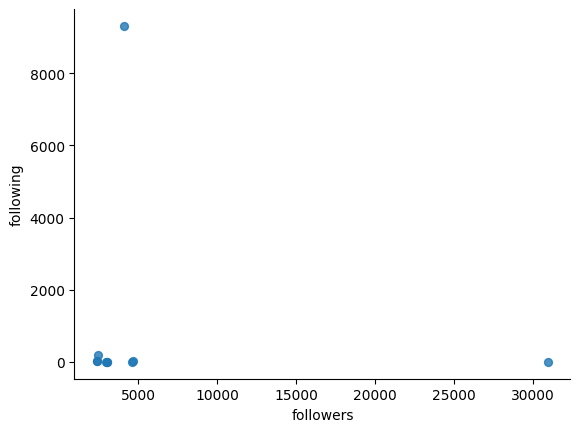

In [5]:
from matplotlib import pyplot as plt
df_users_filtered.nlargest(10,'followers').plot(kind='scatter', x='followers', y='following', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df_users_filtered.groupby('company')['public_repos'].mean().nlargest(5)

,public_repos
company,
MYW3SCHOOLS.COM,1563.0
CRAFTSMAN SYSTEMS,913.0
AMEG-YAG,594.0
CLEVERINSIGHT,389.0
JIOCINEMA,351.0


In [36]:
top_10_users = df_users_filtered.nlargest(10, 'public_repos')
top_10_users

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at,surname
3,manjunath5496,Manjunath.R,MYW3SCHOOLS.COM,"Bangalore, India",manjunath5496@gmail.com,False,"""Science is not only a disciple of reason but,...",1563,4084,9313,2016-06-16 05:02:32+00:00,Manjunath.R
409,Newton-School,Newton School,NaN,Bangalore,tech@newtonschool.co,False,NaN,1002,134,0,2020-04-29 13:56:53+00:00,School
66,tkmagesh,Magesh,CRAFTSMAN SYSTEMS,Bangalore,tkmagesh77@gmail.com,True,NaN,912,569,9,2009-10-07 12:08:28+00:00,Magesh
334,narayanr7,Security Trails,AMEG-YAG,Bangalore,NaN,True,Security Analyst. Checking Bugs and malware fo...,594,154,2056,2015-07-07 14:05:29+00:00,Trails
537,Tivotal,Tivotal,NaN,"Bangalore, India",NaN,False,Tivotal is an online learning platform which h...,561,111,0,2022-12-24 08:03:41+00:00,Tivotal
12,captn3m0,Nemo,NaN,"Bangalore, India",github.contact@captnemo.in,False,"Making and Breaking things, sometimes intentio...",436,1840,786,2011-01-26 08:56:27+00:00,Nemo
161,sangam14,Sangam Biradar,NaN,bangalore,NaN,True,Building Stacks ....,415,283,82,2016-09-04 08:19:04+00:00,Biradar
473,BastinRobin,Bastin Robin,CLEVERINSIGHT,"Bangalore, Nilgiris",NaN,True,Chief Data Scientist @CleverInsight #Programm...,389,120,465,2013-02-10 07:44:17+00:00,Robin
50,itaditya,Aditya Agarwal,ATLASSIAN,"Bangalore, India",adityaa803@gmail.com,True,"\r\n Web Dev @razorpay, GSoC Alum @github\r...",378,702,446,2015-11-16 13:08:12+00:00,Agarwal
49,hasura,Hasura,NaN,"San Francisco, Bangalore",build@hasura.io,False,"The Hasura GraphQL Engine gives you fast, inst...",375,710,0,2015-08-25 16:31:42+00:00,Hasura


In [8]:
df_repos_filtered.head()

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name
0,krishnaik06,krishnaik06/Polars-GPU-Engine-Demo,2024-10-28 08:42:45+00:00,4,4,Jupyter Notebook,True,True,gpl-3.0
1,krishnaik06,krishnaik06/Transformers-Materials,2024-10-19 15:43:30+00:00,11,11,NaN,True,True,gpl-3.0
2,krishnaik06,krishnaik06/ETLWeather,2024-10-15 10:45:09+00:00,8,8,Python,True,True,gpl-3.0
3,krishnaik06,krishnaik06/datasets,2024-10-08 05:16:12+00:00,3,3,NaN,True,True,gpl-3.0
4,krishnaik06,krishnaik06/testdagshub,2024-10-01 16:57:42+00:00,0,0,NaN,True,True,NaN


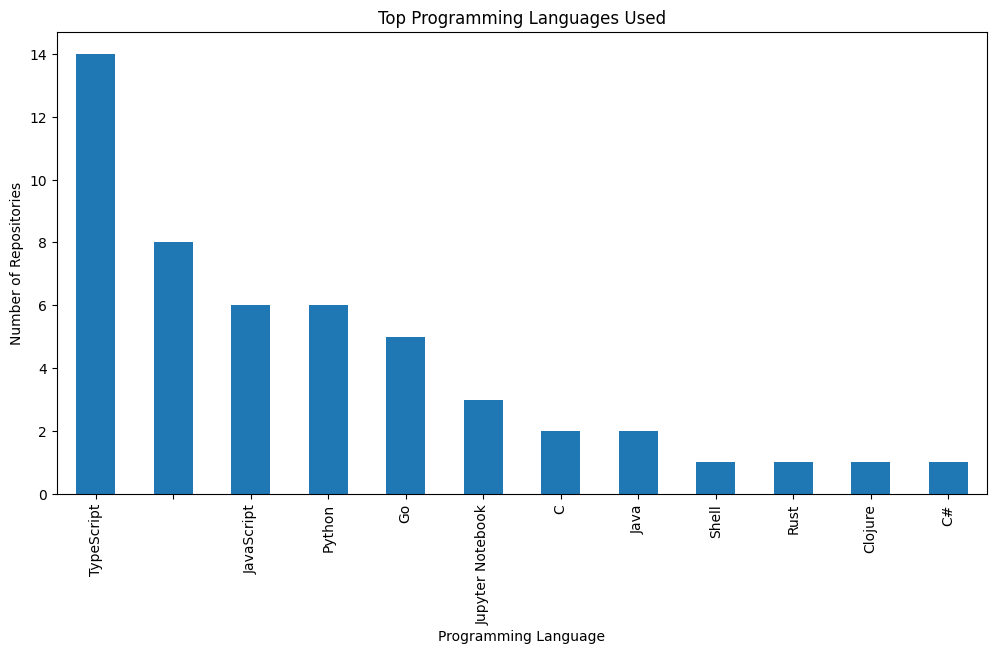

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
reposwith_top_stars = df_repos_filtered.nlargest(50, 'watchers_count')

reposwith_top_stars['language'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Programming Language')
plt.ylabel('Number of Repositories')
_ = plt.title('Top Programming Languages Used')

In [11]:
top_starred_repos = df_repos_filtered.nlargest(10, 'stargazers_count')
top_starred_users = top_starred_repos['login'].tolist()
df_users_filtered[df_users_filtered['login'].isin(top_starred_users)]

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
6,Hack-with-Github,Hack with GitHub,NaN,"Bangalore, India",hackwithgithub@gmail.com,False,An Open Source Hacking Tools database.,11,2973,0,2016-03-29 13:14:08+00:00
7,rahuldkjain,Rahul Jain,THOUGHTSPOT,"Bangalore, India",NaN,True,Software Engineer 👨‍💻\r\nReact.js and Motion D...,97,2426,193,2017-03-14 10:23:00+00:00
23,ad1992,Aakansha Doshi,OPEN-SOURCE,Bangalore,aakansha1216@gmail.com,True,"open-source | maintainer excalidraw, mermaid-t...",51,1166,50,2015-03-01 12:33:19+00:00
25,bigint,Bigint,HEYXYZ,"Bangalore, India",NaN,True,Creator of @heyxyz 🌸,20,1118,198,2020-08-09 17:17:58+00:00
49,hasura,Hasura,NaN,"San Francisco, Bangalore",build@hasura.io,False,"The Hasura GraphQL Engine gives you fast, inst...",377,710,0,2015-08-25 16:31:42+00:00
71,HashNuke,Akash Manohar,NaN,Bangalore,NaN,False,"Created asdf version manager, Heroku Buildpack...",163,553,2,2009-05-13 07:53:25+00:00
108,shahidhk,Shahidh K Muhammed,HASURA,Bangalore,shahidhkmuhammed@gmail.com,False,Engineer at @hasura,153,368,6,2013-04-11 09:43:16+00:00
129,maddhruv,Dhruv Jain,LINKEDIN,Bangalore,dhjain@linkedin.com,True,Observability at @linkedin,125,330,181,2016-03-28 16:21:12+00:00
569,dstala,Raju Udava,NOCODB,Bangalore,NaN,False,NaN,8,103,809,2021-06-26 15:28:02+00:00
572,arjunmahishi,Arjun Mahishi,COCKROACHDB,Bangalore,arjun.mahishi@gmail.com,True,NaN,127,103,42,2015-04-16 11:26:50+00:00


In [13]:
top_followed_users = df_users_filtered.nlargest(10, 'followers')
df_repos_filtered[df_repos_filtered['login'].isin(top_followed_users['login'])].sort_values(by='stargazers_count', ascending=False).head(5)

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name
1647,Hack-with-Github,Hack-with-Github/Awesome-Hacking,2016-03-30 15:47:10+00:00,84478,84478,NaN,False,False,cc0-1.0
1661,rahuldkjain,rahuldkjain/github-profile-readme-generator,2020-07-15 11:20:48+00:00,21564,21564,JavaScript,True,True,apache-2.0
13,krishnaik06,krishnaik06/The-Grand-Complete-Data-Science-Ma...,2023-09-19 06:19:22+00:00,6820,6820,Python,True,True,gpl-2.0
1651,Hack-with-Github,Hack-with-Github/Free-Security-eBooks,2016-04-21 12:26:50+00:00,4322,4322,NaN,True,False,NaN
30,krishnaik06,krishnaik06/Roadmap-To-Learn-Generative-AI-In-...,2023-12-11 11:43:22+00:00,3216,3216,NaN,True,False,gpl-3.0


In [14]:
df_users_filtered.groupby('company')['email'].count().nlargest(5)

,email
company,
GOOGLE,11
RAZORPAY,6
MICROSOFT,5
GOJEK,3
LINKEDIN,3


In [30]:
len(df_repos_filtered['language'].unique())

175

In [25]:
language_counts = df_repos_filtered['language'].value_counts()
low_repo_languages = language_counts[language_counts <= 3]
low_repo_languages

,count
language,
Logos,3
Mathematica,3
Nunjucks,3
Objective-C++,3
Just,3
...,...
Typst,1
Sass,1
RAML,1


In [26]:
low_langs = low_repo_languages.index.tolist()
df_repos_filtered[df_repos_filtered['language'].isin(low_langs)].nlargest(5, 'stargazers_count')

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name
12191,0x48piraj,0x48piraj/incarcero,2017-05-15 08:27:33+00:00,92,92,Pascal,True,True,gpl-3.0
4520,saiyam1814,cncf/cloudnativetv,2021-02-26 17:55:51+00:00,34,34,CUE,True,True,apache-2.0
14941,ameerthehacker,ameerthehacker/ts-native,2020-03-11 13:28:08+00:00,28,28,ANTLR,True,True,NaN
5138,anandology,internetarchive/CDX-Writer,2012-07-17 23:07:24+00:00,20,20,Arc,True,True,agpl-3.0
14533,kunalg123,kunalg123/riscv_workshop_collaterals,2020-03-09 14:58:17+00:00,20,20,Coq,True,True,NaN
